# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from scipy.stats import skew

from sklearn.preprocessing import  StandardScaler, normalize
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest

from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

# Data Exploration

In [2]:
df = pd.read_csv(r'Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.drop('CustomerID', inplace=True, axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Data Visualization

In [9]:
plt.style.use('seaborn-darkgrid')

## 1. Univariate Analysis

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual Income (k$)'}>,
        <AxesSubplot:title={'center':'Spending Score (1-100)'}>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

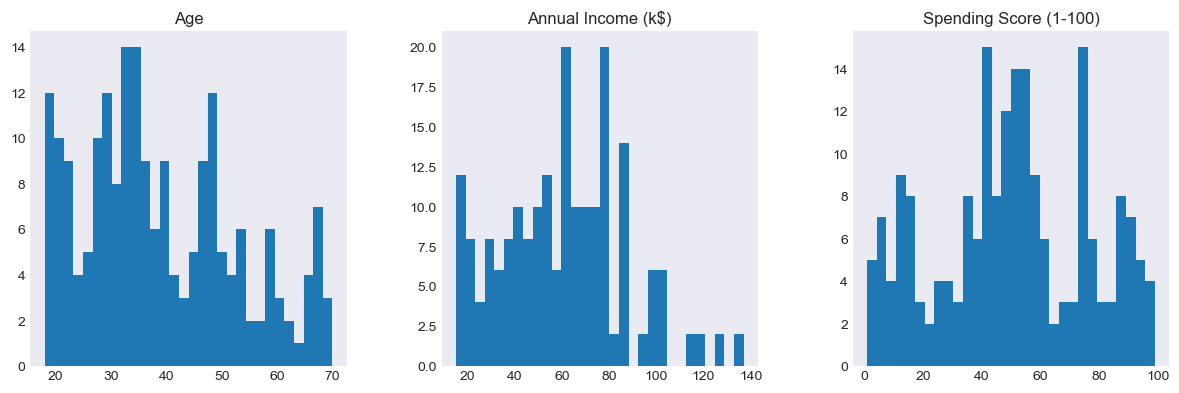

In [10]:
df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [11]:
nf = df.select_dtypes(include=[np.number]).columns
nf

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [12]:
cf = df.select_dtypes(include=[np.object]).columns
cf

Index(['Gender'], dtype='object')

In [13]:
skew_values = skew(df[nf], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(nf), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
0,Age,0.481919
1,Annual Income (k$),0.319424
2,Spending Score (1-100),-0.046865


### Histograms

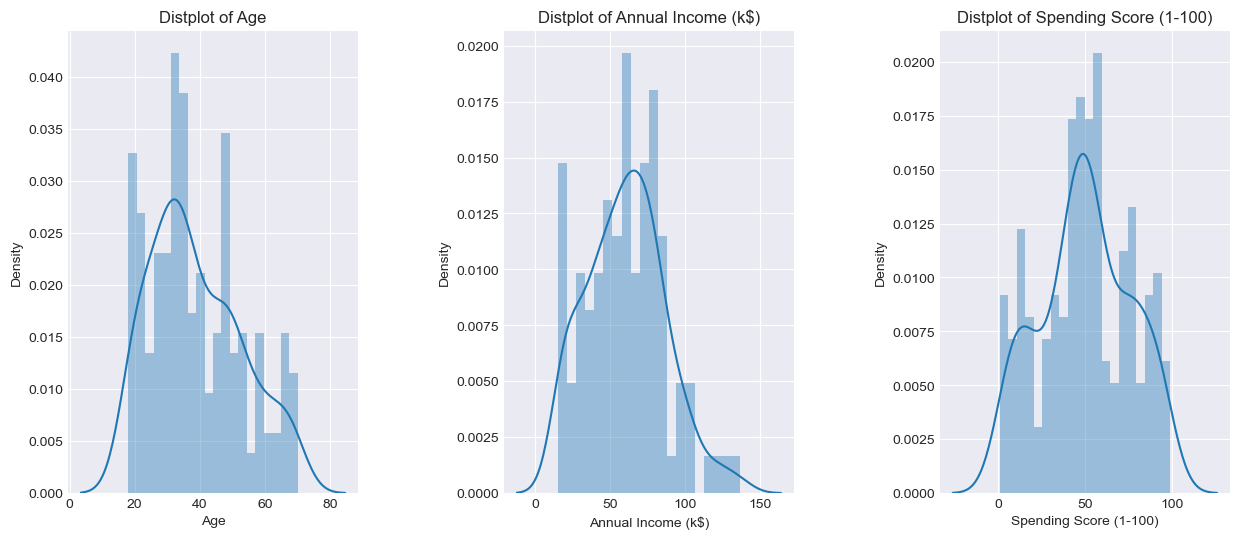

In [14]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

### Count Plot of Gender

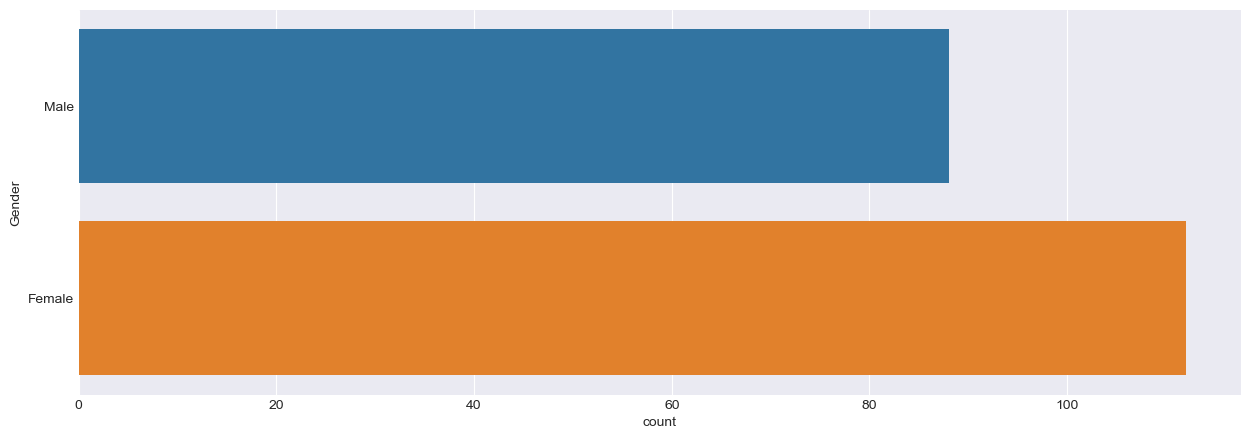

In [15]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

## 2. Bivariate Analysis

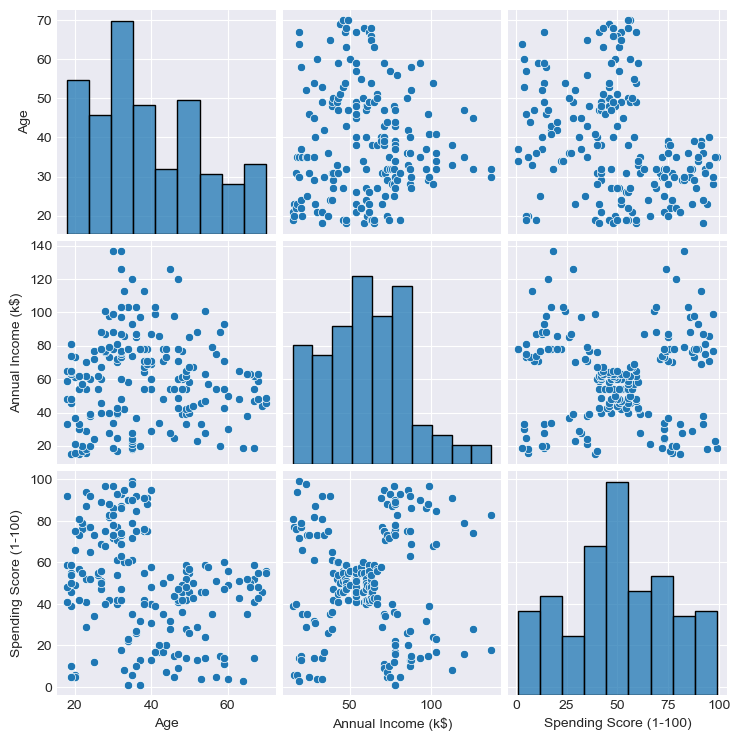

In [16]:
sns.pairplot(df[nf])

### Ploting the Relation between Age , Annual Income and Spending Score

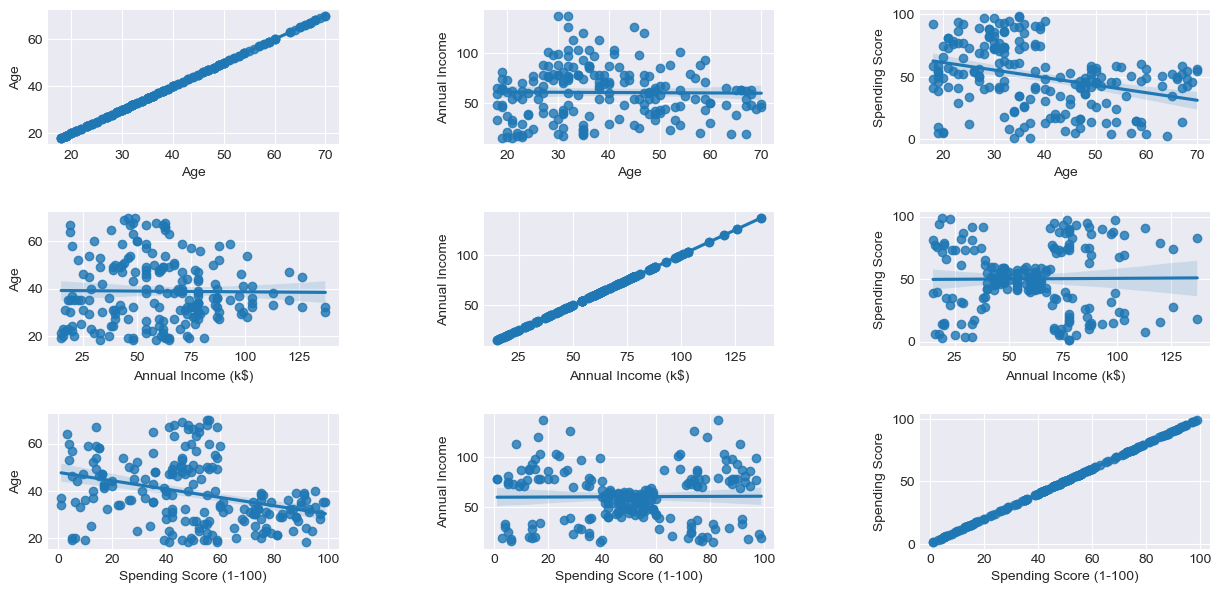

In [17]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

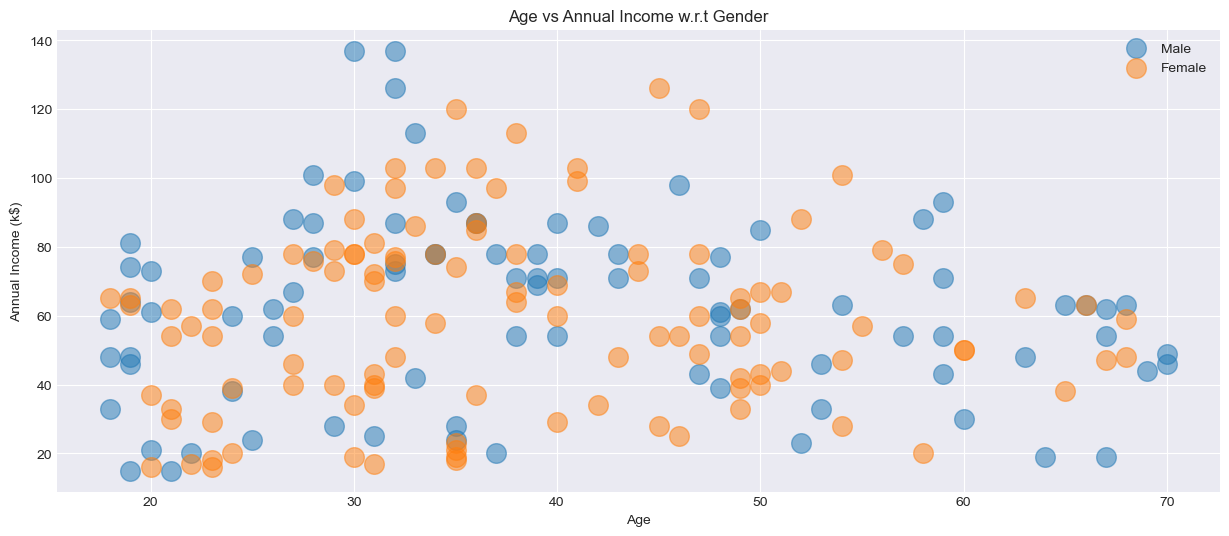

In [18]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

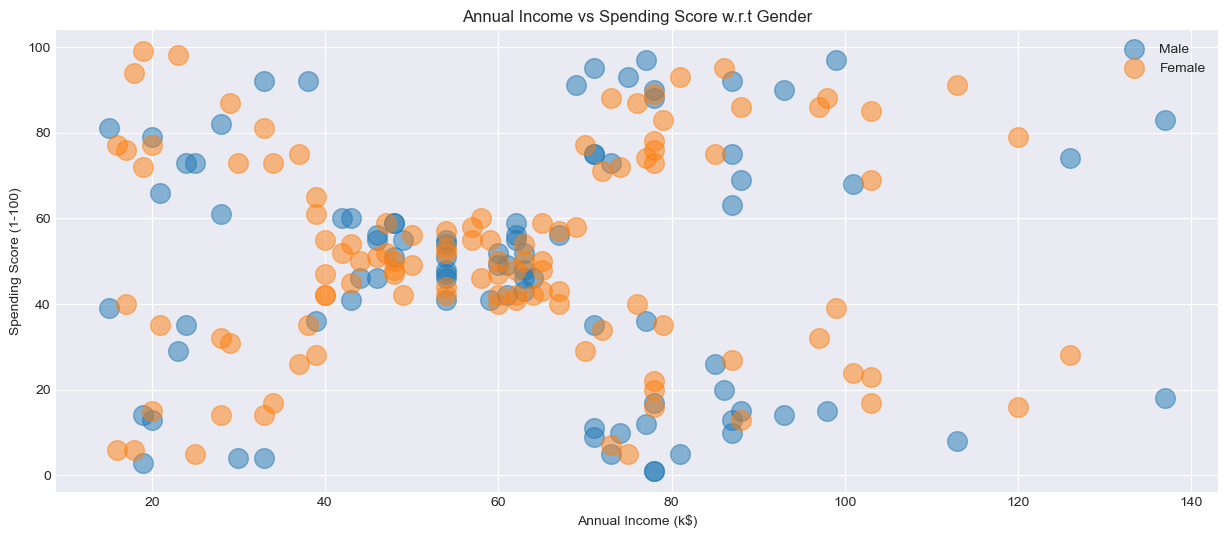

In [19]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

### Distribution of values in Age , Annual Income and Spending Score according to Gender

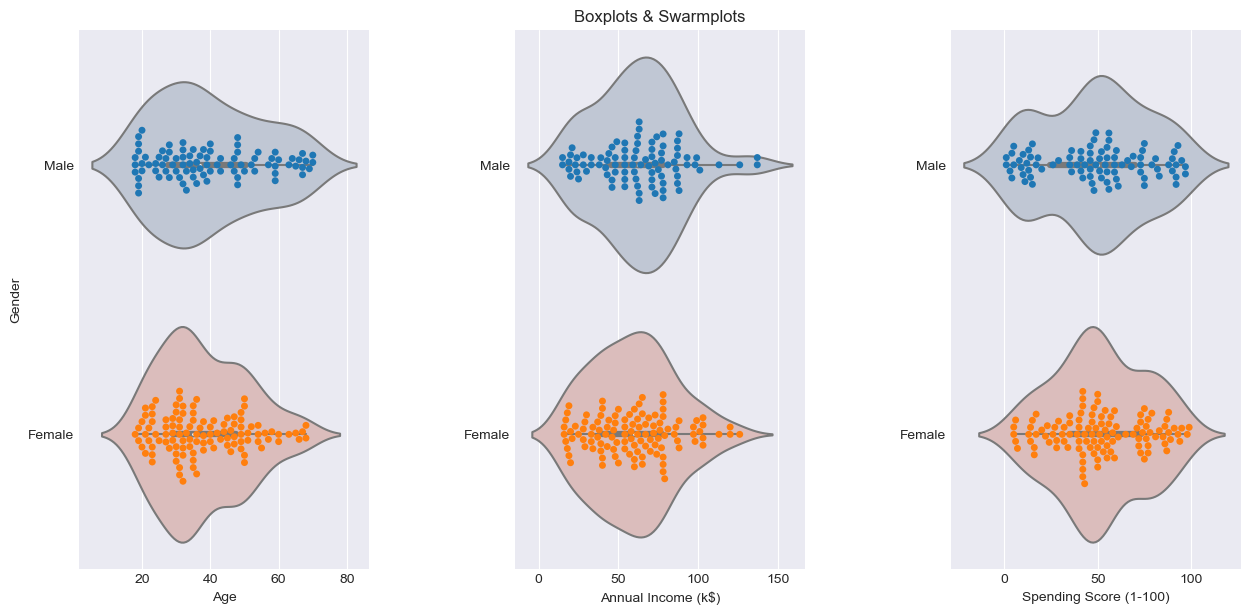

In [20]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

## 3. Multivariate Analysis

<AxesSubplot:>

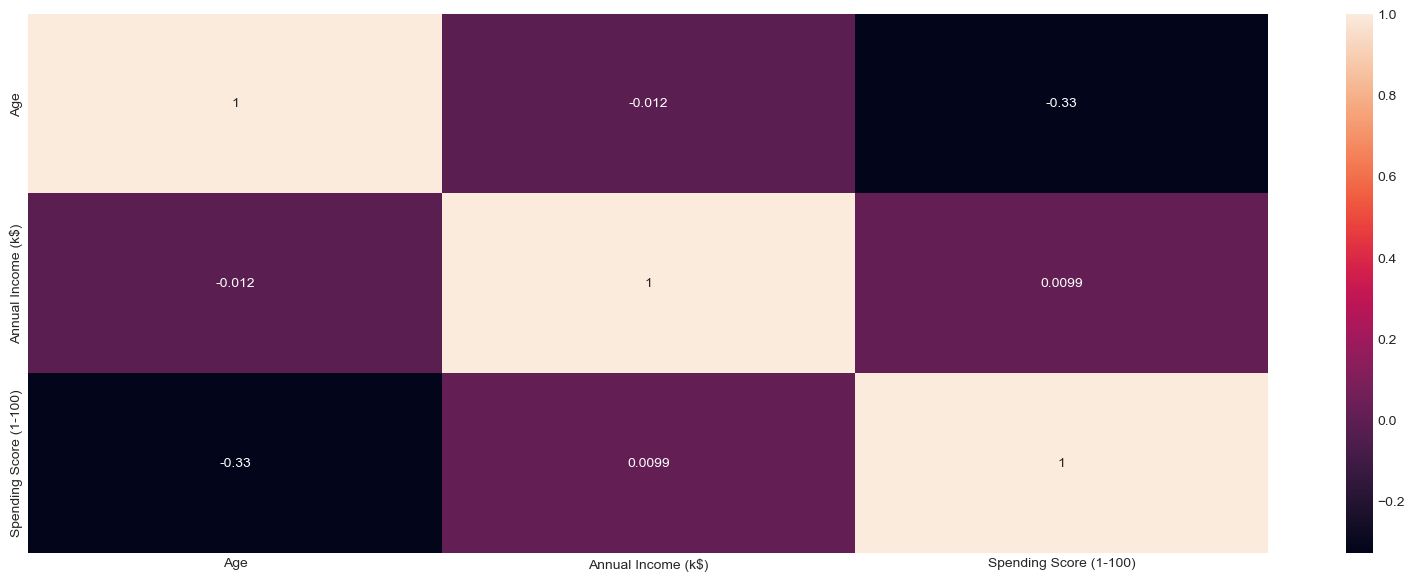

In [21]:
plt.figure(figsize=(20,7))
sns.heatmap(df[nf].corr(), annot=True)

# Outliers

In [22]:
data = pd.get_dummies(df)
dummy_data = data.copy()

<AxesSubplot:>

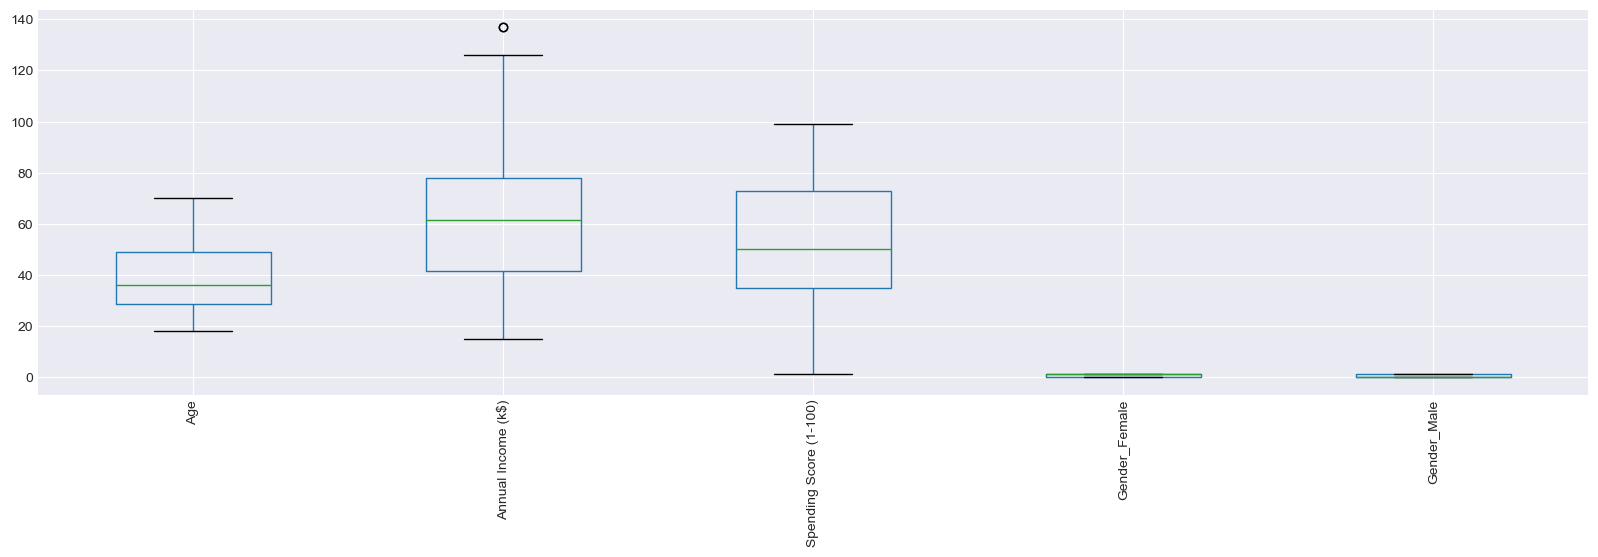

In [23]:
data.boxplot(rot=90, figsize=(20,5))

In [24]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
((data[data.columns] < (Q1 - 1.5 * IQR)) | (data[data.columns] > (Q3 + 1.5 * IQR))).sum()

Age                       0
Annual Income (k$)        2
Spending Score (1-100)    0
Gender_Female             0
Gender_Male               0
dtype: int64

In [25]:
scaler = StandardScaler()
df_scl = scaler.fit_transform(data)
norm = normalize(df_scl)
df_norm = pd.DataFrame(norm)
df_norm

,0,1,2,3,4
0,-0.510470,-0.623140,-0.155804,-0.404254,0.404254
1,-0.435809,-0.591608,0.406779,-0.383798,0.383798
2,-0.445071,-0.559572,-0.564534,0.291627,-0.291627
3,-0.434915,-0.650299,0.397795,0.338910,-0.338910
4,-0.256873,-0.758104,-0.180550,0.404164,-0.404164
...,...,...,...,...,...
195,-0.097412,0.799880,0.394181,0.312509,-0.312509
196,0.149225,0.844508,-0.291387,0.299693,-0.299693
197,-0.156400,0.794664,0.293951,-0.358916,0.358916
198,-0.137072,0.813528,-0.348550,-0.314560,0.314560


# K-Means Clustering

In [26]:
error = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(df_norm)
    error.append(kmeans.inertia_)
    
error

[199.15561924166775,
 110.39360269699867,
 87.04873523574733,
 68.77404114783904,
 57.71800292006186,
 48.85799319465014,
 40.43323349852963,
 33.660219212569494,
 28.866778288413617,
 24.84688219634544]

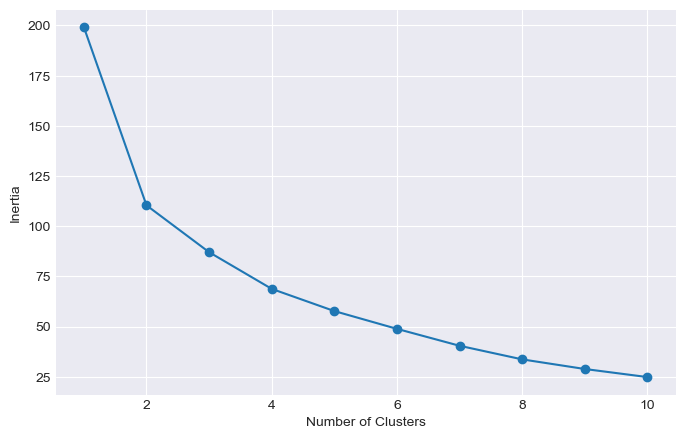

In [27]:
dfk = pd.DataFrame({'Cluster':range(1,11), 'Score':error})
plt.figure(figsize=(8,5))
plt.plot(dfk['Cluster'], dfk['Score'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [28]:
for i in range(2, 15):
    kmeans_label = KMeans(n_clusters=i, random_state=123).fit_predict(df_norm)
    print("Silhouette Score for {} clusters k-means: {} ".format(i, metrics.silhouette_score(df_norm, kmeans_label, metric='euclidean').round(3)))

Silhouette Score for 2 clusters k-means: 0.411 
Silhouette Score for 3 clusters k-means: 0.36 
Silhouette Score for 4 clusters k-means: 0.355 
Silhouette Score for 5 clusters k-means: 0.371 
Silhouette Score for 6 clusters k-means: 0.395 
Silhouette Score for 7 clusters k-means: 0.412 
Silhouette Score for 8 clusters k-means: 0.435 
Silhouette Score for 9 clusters k-means: 0.446 
Silhouette Score for 10 clusters k-means: 0.464 
Silhouette Score for 11 clusters k-means: 0.463 
Silhouette Score for 12 clusters k-means: 0.461 
Silhouette Score for 13 clusters k-means: 0.46 
Silhouette Score for 14 clusters k-means: 0.443 


In [29]:
for i in [3, 4, 5, 6]:
    kmeans_label = KMeans(n_clusters=i, random_state=123).fit_predict(df_norm)
    print("Davies Bouldin Score:"+str(metrics.davies_bouldin_score(df_norm, kmeans_label).round(3)))

Davies Bouldin Score:1.158
Davies Bouldin Score:1.239
Davies Bouldin Score:1.082
Davies Bouldin Score:0.995


In [30]:
kmeans_label = KMeans(n_clusters=6, random_state=123).fit_predict(df_norm)
kmeans_label

array([2, 2, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 4, 3, 1, 2, 3, 2, 1, 3, 1, 2,
       4, 2, 4, 2, 4, 2, 4, 3, 1, 3, 1, 2, 4, 3, 4, 3, 3, 3, 4, 2, 1, 3,
       4, 3, 4, 3, 3, 3, 4, 2, 3, 1, 4, 1, 4, 1, 3, 1, 1, 2, 4, 4, 1, 2,
       4, 4, 2, 3, 1, 4, 4, 4, 1, 2, 4, 1, 3, 4, 1, 2, 1, 4, 3, 1, 4, 3,
       3, 4, 4, 2, 1, 5, 3, 2, 4, 3, 1, 2, 3, 4, 1, 2, 1, 3, 4, 1, 1, 1,
       1, 3, 5, 2, 3, 3, 4, 4, 4, 4, 2, 5, 0, 2, 5, 0, 1, 2, 1, 2, 1, 2,
       5, 0, 2, 0, 5, 2, 2, 0, 5, 2, 5, 0, 2, 2, 1, 0, 5, 2, 1, 2, 5, 0,
       5, 0, 1, 0, 1, 0, 5, 0, 2, 0, 1, 0, 1, 0, 5, 2, 1, 2, 1, 2, 5, 0,
       1, 2, 1, 2, 5, 0, 1, 0, 5, 2, 5, 2, 5, 0, 5, 0, 1, 0, 5, 0, 5, 2,
       2, 2])

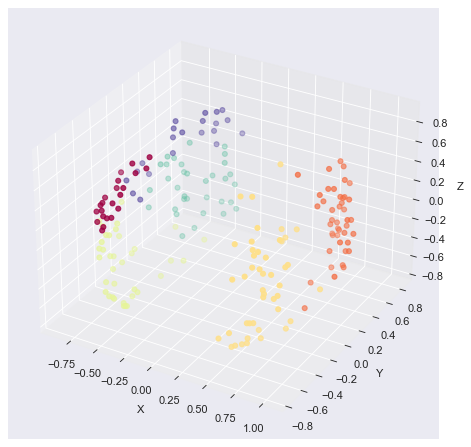

In [31]:
pca = PCA(n_components=3).fit_transform(df_norm)
fig = plt.figure(figsize=(12,7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2], c=kmeans_label, cmap='Spectral')
xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

In [32]:
data_label = data.columns
data_label

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [33]:
df_norm.set_axis(data_label, axis='columns', inplace=True)
df_norm['kclus'] = pd.Series(kmeans_label)
df_norm.head(5)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,kclus
0,-0.510470,-0.623140,-0.155804,-0.404254,0.404254,2
1,-0.435809,-0.591608,0.406779,-0.383798,0.383798,2
2,-0.445071,-0.559572,-0.564534,0.291627,-0.291627,3
3,-0.434915,-0.650299,0.397795,0.338910,-0.338910,3
4,-0.256873,-0.758104,-0.180550,0.404164,-0.404164,3


# Pre-processing, Modelling and Evaluation

## X and y split

In [34]:
X = df_norm.drop('kclus', axis = 1)
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-0.510470,-0.623140,-0.155804,-0.404254,0.404254
1,-0.435809,-0.591608,0.406779,-0.383798,0.383798
2,-0.445071,-0.559572,-0.564534,0.291627,-0.291627
3,-0.434915,-0.650299,0.397795,0.338910,-0.338910
4,-0.256873,-0.758104,-0.180550,0.404164,-0.404164


In [35]:
y = df_norm['kclus']
y.head()

0    2
1    2
2    3
3    3
4    3
Name: kclus, dtype: int32

## Scale the independent variables

In [36]:
standardScale = StandardScaler()
standardScale.fit_transform(X)

selectkBest = SelectKBest(k='all')
X_new = selectkBest.fit_transform(X, y)

## Train, Test and Split

In [37]:
train_X,val_X,train_y,val_y = train_test_split(X_new, y, test_size = 0.2, random_state = 42)

In [38]:
print("Shape of Training X :", train_X.shape)
print("Shape of Validation X :", val_X.shape)

Shape of Training X : (160, 5)
Shape of Validation X : (40, 5)


In [39]:
print("Shape of Training y :", train_y.shape)
print("Shape of Validation y :", val_y.shape)

Shape of Training y : (160,)
Shape of Validation y : (40,)


## KNN-Model

In [40]:
model = KNeighborsClassifier()
model.fit(train_X, train_y)

KNeighborsClassifier()

In [41]:
y_pred = model.predict(val_X)

In [42]:
y_pred1 = model.predict(train_X)

## Evaluation

In [43]:
print('Testing accuracy: ', metrics.accuracy_score(val_y, y_pred))
print('Training accuracy: ', metrics.accuracy_score(train_y, y_pred1))

Testing accuracy:  0.925
Training accuracy:  0.9625


In [44]:
pd.crosstab(val_y, y_pred)

col_0,0,1,2,3,4,5
kclus,,,,,,
0,3,0,0,0,0,0
1,0,12,0,0,0,0
2,0,0,7,0,0,0
3,0,0,0,7,0,0
4,0,0,0,0,4,0
5,0,0,0,2,1,4


In [45]:
print(metrics.classification_report(val_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         7
           3       0.78      1.00      0.88         7
           4       0.80      1.00      0.89         4
           5       1.00      0.57      0.73         7

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.94      0.93      0.92        40



In [46]:
# testing with a random observation
model.predict([[200, 400, 5400, 45, 399]])

array([2])